In [18]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/USER/Desktop/AI_Study/dataset/diabets.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
X = df.drop('Outcome', axis=1)
X = X.drop('BMI', axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,0.627,50
1,1,85,66,29,0,0.351,31
2,8,183,64,0,0,0.672,32
3,1,89,66,23,94,0.167,21
4,0,137,40,35,168,2.288,33
...,...,...,...,...,...,...,...
763,10,101,76,48,180,0.171,63
764,2,122,70,27,0,0.340,27
765,5,121,72,23,112,0.245,30
766,1,126,60,0,0,0.349,47


In [22]:
y = df['BMI']
y

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [23]:
#원 핫 인코딩
Y = pd.get_dummies(y).values

In [24]:
#넘파이 변환
X = X.values

In [25]:
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(6,input_shape=(7,),activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 6)                 48        
                                                                 
 dense_5 (Dense)             (None, 10)                70        
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 239 (956.00 Byte)
Trainable params: 239 (956.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
20/20 [==============================] - 1s 14ms/step - loss: 0.0508 - mse: 0.0508 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 2/10
20/20 [==============================] - 0s 5ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 3/10
20/20 [==============================] - 0s 6ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4/10
20/20 [==============================] - 0s 5ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 5/10
20/20 [==============================] - 0s 5ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 6/10
20/20 [==============================] - 0s 5ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 7/10
20/20 [==============================] - 0s 5ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 8/10
20/20 [==============================] - 0s 5ms/step - loss: 0.0045 - mse: 0.0

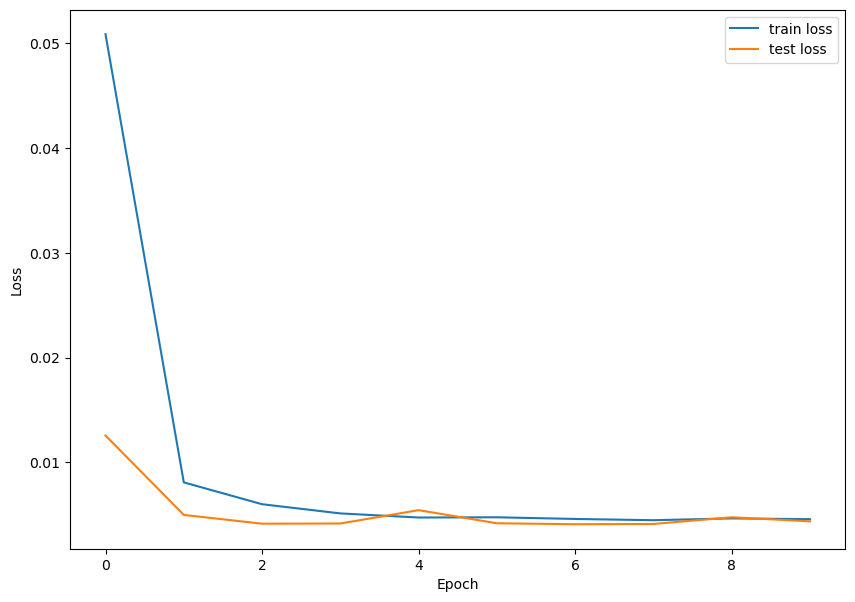

In [30]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 6ms/step - loss: 0.0044 - mse: 0.0044


[0.0043874457478523254, 0.0043874457478523254]